# Eksploratorna analiza podataka

### 1. Izvlačenje potrebnih podataka iz datoteke CTG.xls 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
#imena stupaca u CTG.xls koje ćemo koristiti
column_names = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max',
                   'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']

#stupci koji sadrže int vrijednosti, samo za ljepši ispis
int_columns = ['LB' ,'ASTV' ,'ALTV' ,'Width' ,'Min' ,'Max' ,'Nmax' ,'Nzeros' ,'Mode' ,'Mean' ,'Median' ,'Variance',
               'Tendency', 'NSP']

In [4]:
data = pd.read_excel('CTG.xls', sheet_name = 'Data', skiprows = 1, 
                     usecols = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 45]
                     , names = column_names)

#izbacujemo sve retke u kojima je barem jedna varijabla nepoznata (NaN)
data = data.dropna()

for col in int_columns:
    data[col] = (data[col]).astype(int)

In [5]:
data.head(15)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.000000,0.006380,0.003190,0.0,0.000000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.000000,0.008306,0.003322,0.0,0.000000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.000000,0.007682,0.002561,0.0,0.000000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.000000,0.008143,0.000000,0.0,0.000000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
5,134,0.001049,0.000000,0.010493,0.009444,0.0,0.002099,26,5.9,0,...,50,200,5,3,76,107,107,170,0,3
6,134,0.001403,0.000000,0.012623,0.008415,0.0,0.002805,29,6.3,0,...,50,200,6,3,71,107,106,215,0,3
7,122,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,83,0.5,6,...,62,130,0,0,122,122,123,3,1,3
8,122,0.000000,0.000000,0.001517,0.000000,0.0,0.000000,84,0.5,5,...,62,130,0,0,122,122,123,3,1,3
9,122,0.000000,0.000000,0.002967,0.000000,0.0,0.000000,86,0.3,6,...,62,130,1,0,122,122,123,1,1,3


Prvih 21 stupaca označava vrijednosti obilježja CTG snimki. <br>
Zadnji stupac označava u koju od 3 klase snimka pripada. <br>
Oznake klasa su 1=Normal, 2=Suspect, 3=Pathologic.


Iz datoteke čitamo i opis svakog obilježja.

In [6]:
data_description = pd.read_excel('CTG.xls', sheet_name = 'Description', skiprows = 11, nrows=22, header=None, 
                                 usecols=[2,3], names=['Data','Description'])
pd.options.display.max_colwidth=100
styles = [
    dict(selector="td", props=[("text-align", "center")]), dict(selector="th", props=[("text-align", "center")])]

data_description.style.set_table_styles(styles)

,Data,Description
0,LB,baseline value (SisPorto)
1,AC,accelerations (SisPorto)
2,FM,foetal movement (SisPorto)
3,UC,uterine contractions (SisPorto)
4,ASTV,percentage of time with abnormal short term variability (SisPorto)
5,mSTV,mean value of short term variability (SisPorto)
6,ALTV,percentage of time with abnormal long term variability (SisPorto)
7,mLTV,mean value of long term variability (SisPorto)
8,DL,light decelerations
9,DS,severe decelerations


### 2. Analiza dobivenih podataka

#### 2.1. Distribucija klasa NSP

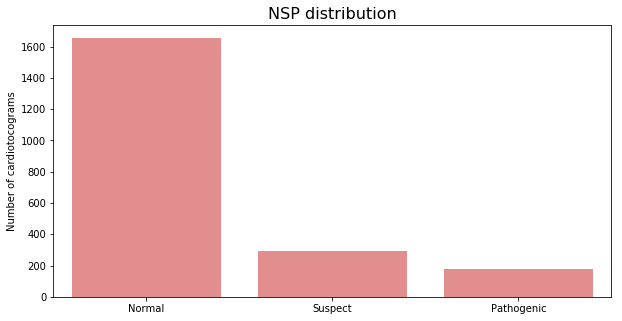

In [26]:
counts = data['NSP'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(counts.index, counts.values, color = 'lightcoral')

plt.xticks((0,1,2),('Normal', 'Suspect', 'Pathogenic'))
plt.ylabel('Number of cardiotocograms')
plt.title('NSP distribution', fontsize=16)
plt.show()

Vidimo da je većina primjeraka u klasi Normal, a najmanje ih je u klasi Pathogenic.

In [15]:
norm = cnt_srs[1]
susp = cnt_srs[2]
path = cnt_srs[3]
print("Udio normalnih kardiotokograma:",norm/data.shape[0])
print("Udio sumnjivih kardiotokograma:",susp/data.shape[0])
print("Udio patoloških kardiotokograma:",path/data.shape[0])

Udio normalnih kardiotokograma: 0.7784571966133584
Udio sumnjivih kardiotokograma: 0.138758231420508
Udio patoloških kardiotokograma: 0.08278457196613359


Zaključujemo da ćemo rješavati nebalansirani klasifikacijski problem.

#### 2.2. Analiza pojedinih obilježja

Koje vrijednosti mogu poprimati dana obilježja?

In [32]:
values = dict()
for col in column_names:
    values[col] = dict()
    values[col]['max'] = data[col].max()
    values[col]['min'] = data[col].min()

df = pd.DataFrame(values).T
df = df[['min','max']]
df

,min,max
LB,106.0,160.000000
AC,0.0,0.019284
FM,0.0,0.480634
UC,0.0,0.014925
DL,0.0,0.015385
DS,0.0,0.001353
DP,0.0,0.005348
ASTV,12.0,87.000000
MSTV,0.2,7.000000
ALTV,0.0,91.000000


Koliko različitih vrijednosti poprima pojedino obilježje?

In [42]:
unique_values = dict()
for col in column_names:
    unique_values[col] = (data[col].unique()).shape[0]
unique_values

{'LB': 48,
 'AC': 1015,
 'FM': 696,
 'UC': 1315,
 'DL': 751,
 'DS': 8,
 'DP': 166,
 'ASTV': 75,
 'MSTV': 57,
 'ALTV': 87,
 'MLTV': 249,
 'Width': 154,
 'Min': 109,
 'Max': 86,
 'Nmax': 18,
 'Nzeros': 9,
 'Mode': 88,
 'Mean': 103,
 'Median': 95,
 'Variance': 133,
 'Tendency': 3,
 'NSP': 3}

Crtamo neke od histogram obilježja, za svaku NSP klasu.

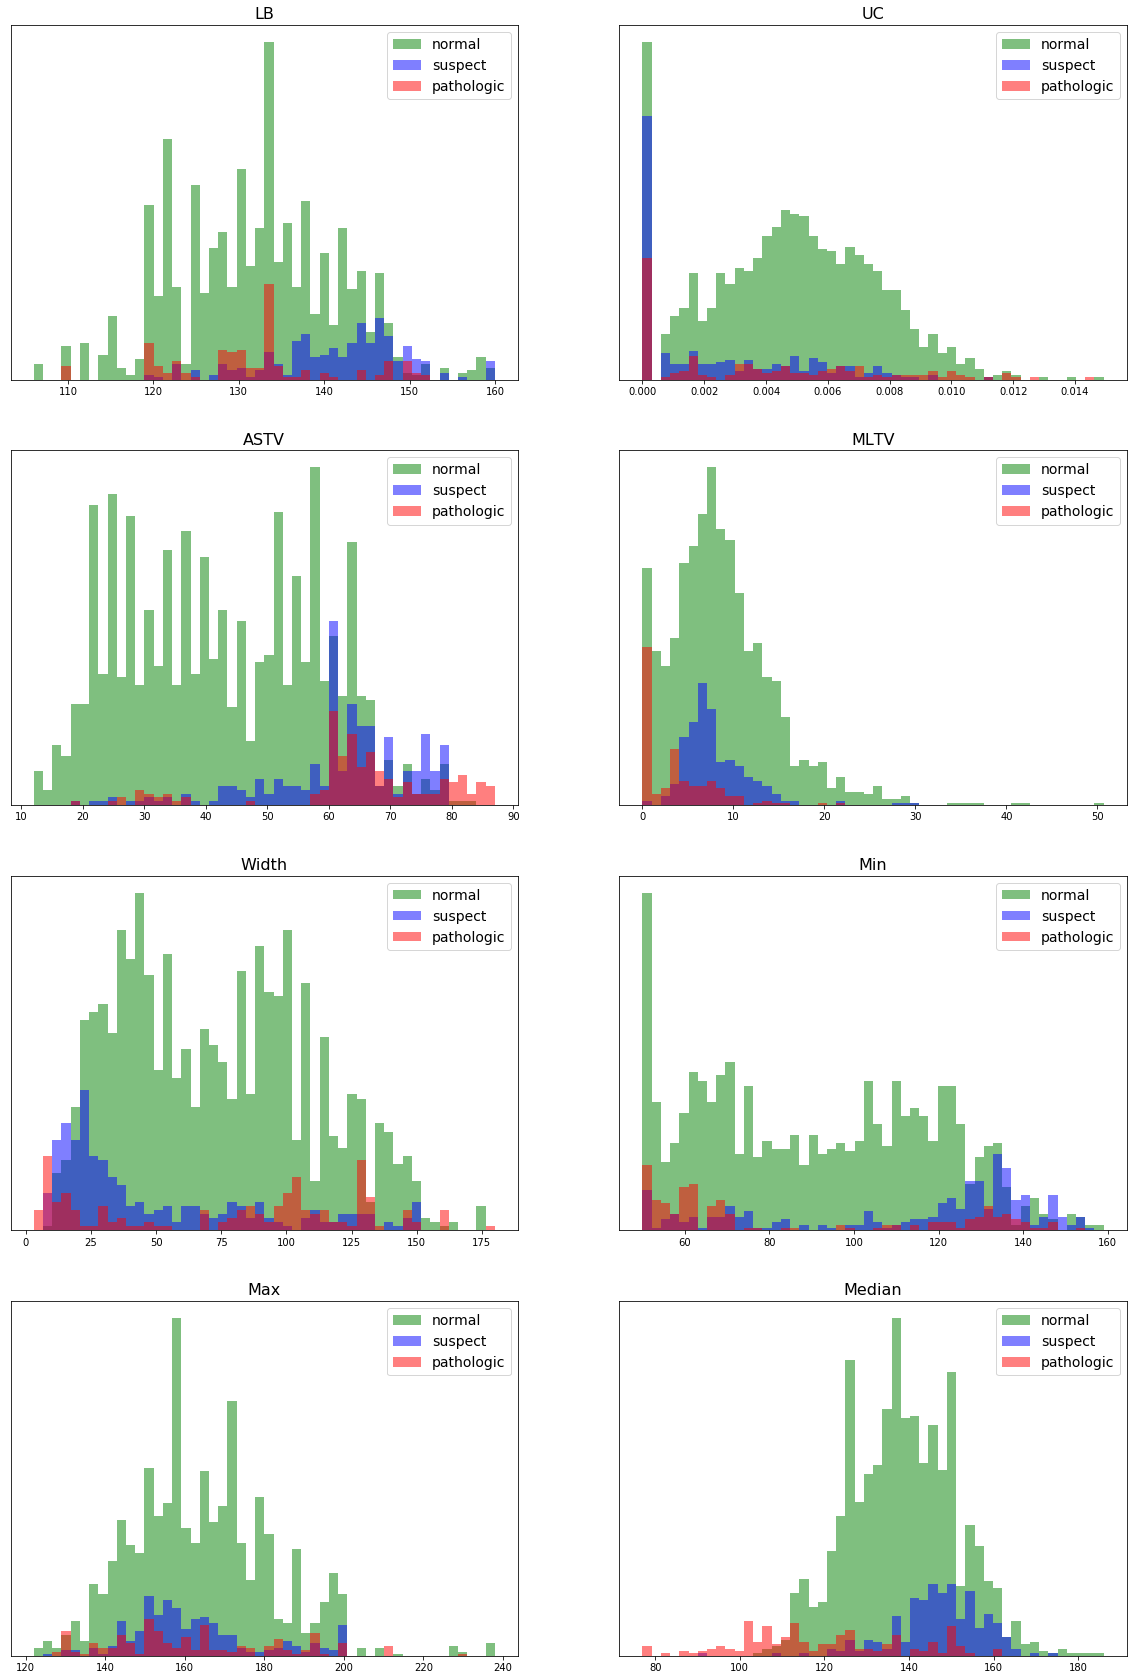

In [21]:
normal = data.loc[data['NSP'] == 1, : ]
suspect = data.loc[data['NSP'] == 2, : ]
pathologic = data.loc[data['NSP'] == 3, : ]

fig, axes = plt.subplots(4, 2, figsize=(20, 30))
ax = axes.ravel()

indices = list()
indices.append(column_names.index('LB'))
indices.append(column_names.index('UC'))
indices.append(column_names.index('ASTV'))
indices.append(column_names.index('MLTV'))
indices.append(column_names.index('Width'))
indices.append(column_names.index('Min'))
indices.append(column_names.index('Max'))
indices.append(column_names.index('Median'))

j = 0

for i in indices:
    _, bins = np.histogram(data.iloc[:,i], bins = 50)
    ax[j].hist(normal.iloc[:,i], bins = bins, color = 'g', alpha = .5, label = 'normal')
    ax[j].hist(suspect.iloc[:,i], bins = bins, color = 'b', alpha = .5, label = 'suspect')
    ax[j].hist(pathologic.iloc[:,i], bins = bins, color = 'r', alpha = .5, label = 'pathologic')
    ax[j].set_title(data.columns.values[i], fontdict = {'fontsize': 16})
    ax[j].set_yticks(()) 
    ax[j].legend(loc = 'upper right', fontsize = 14)
    j += 1

Na temelju dobivenih histograma ne možemo direktno zaključiti koja obilježja će biti značajnija od ostalih.

Na kraju grafički prikazujemo korelacije između obilježja pomoću matrice korelacije.

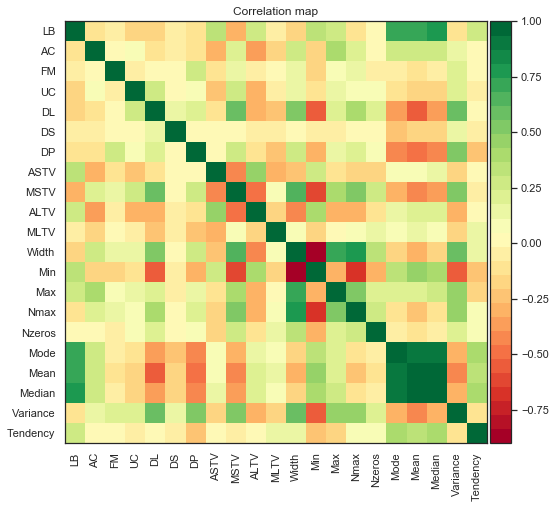

In [74]:
X_corr = data.drop('NSP', axis = 1).corr()
cmap = cm.get_cmap('RdYlGn', 30)

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
iax = ax.imshow(X_corr, interpolation = "nearest", cmap=cmap)
ax.grid(False)
ax.set(title = 'Correlation map')
ax.set_xticks(range(X_corr.shape[1]))
ax.set_xticklabels(data.drop('NSP',axis = 1).columns.values, rotation = 90)
ax.set_yticks(range(X_corr.shape[1]))
ax.set_yticklabels(data.drop('NSP',axis = 1).columns.values)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(iax,cax)

plt.show()

Vidimo da mnoga obilježja međusobno nisu korelirana, ali postoje i obilježja između kojih postoji gotovo potpuna korelacija (Mean-Mode, Median-Mode, Median-Mean). Također, pojavljuje se i negativna korelacija (Min-Width, Nmax-Min).